In [47]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [52]:
#Read in file and create dataframe

#filepath = os.path.join("stocks.csv")
#file = pd.read_csv(filepath)
spotify = pd.read_csv('../resources/top_spotify_songs_2010_2019.csv', encoding='cp1252')
spotify_df = pd.DataFrame(spotify)
#spotify_df = spotify_df.set_index("Index", inplace = True)
spotify_df

,Index,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [164]:
#Renaming Spotify Dataset Columns
spotify_df = spotify_df.rename(columns={"title":"Title","artist":"Artist","top genre":"Genre","year":"Year",
                                        "bpm":"Tempo","nrgy":"Energy","dnce":"Danceability","dB":"Loudness","live":"Liveness","val":"Valence",
                                        "dur":"Length","acous":"Acousticness","spch":"Speechiness","pop":"Popularity"})
spotify_df.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [191]:
#Counting number of times an artist made the list within the 10 year period
top_artists_df = pd.DataFrame(spotify_df['Artist'].value_counts().head(10))
top_artists_df['Index'] = top_artists_df.index
top_artists_df.head(20)

,Artist,Index
Katy Perry,17,Katy Perry
Justin Bieber,16,Justin Bieber
Rihanna,15,Rihanna
Maroon 5,15,Maroon 5
Lady Gaga,14,Lady Gaga
Bruno Mars,13,Bruno Mars
The Chainsmokers,11,The Chainsmokers
Shawn Mendes,11,Shawn Mendes
Pitbull,11,Pitbull
Ed Sheeran,11,Ed Sheeran


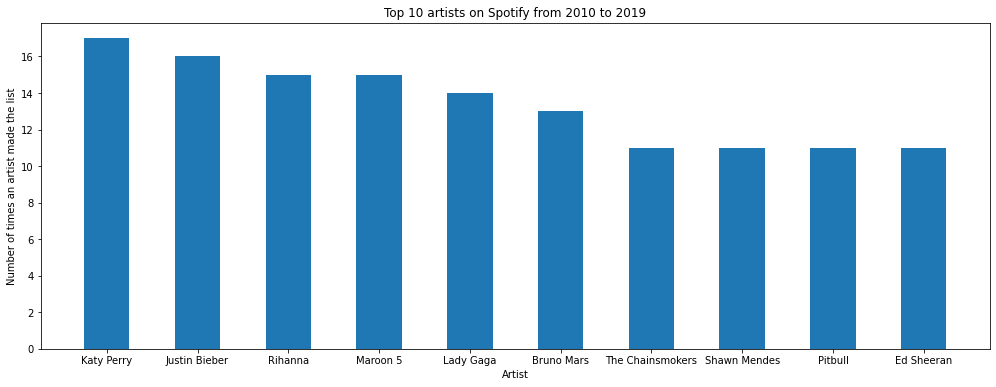

In [199]:
#Plot top artists
plt.figure(figsize=(17,6))
plt.bar(top_artists_df['Index'], top_artists_df['Artist'], width = 0.5)
plt.xlabel('Artist')
plt.ylabel('Number of times an artist made the list')
plt.title('Top 10 artists on Spotify from 2010 to 2019')
plt.show()

In [200]:
#Counting number of times a Genre made the top list within the 10 year period
genre_df = pd.DataFrame(spotify_df['Genre'].value_counts().head(10))
genre_df['Index'] = genre_df.index
genre_df = genre_df.rename(columns={"Genre":"Count","Index":"Genre"})
genre_df

,Count,Genre
dance pop,327,dance pop
pop,60,pop
canadian pop,34,canadian pop
boy band,15,boy band
barbadian pop,15,barbadian pop
electropop,13,electropop
british soul,11,british soul
big room,10,big room
canadian contemporary r&b,9,canadian contemporary r&b
neo mellow,9,neo mellow


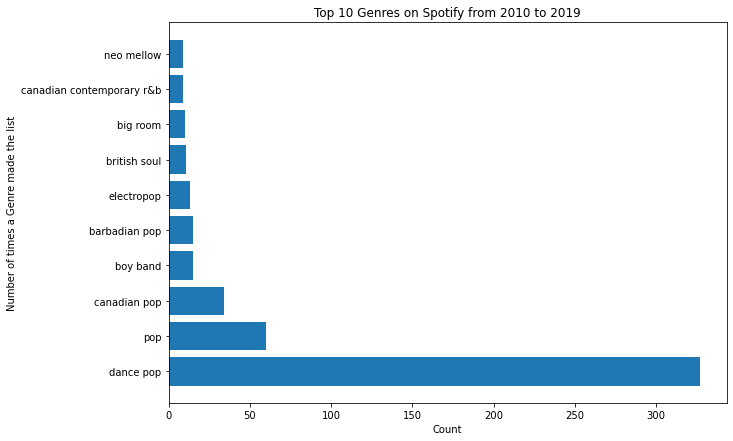

In [203]:
#Plot top genre
plt.figure(figsize=(10,7))
plt.barh(genre_df['Genre'], genre_df['Count'])
plt.xlabel('Count')
plt.ylabel('Number of times a Genre made the list')
plt.title('Top 10 Genres on Spotify from 2010 to 2019')
plt.show()

In [169]:
#Counting number of times a song stayed in the top list within the 10 year period
spotify_df['Title'].value_counts().head()

Written in the Stars (feat. Eric Turner)    2
Castle Walls (feat. Christina Aguilera)     2
Here                                        2
Say Something                               2
Stitches                                    2
Name: Title, dtype: int64

In [204]:
#First Third of dataset
first_third_df = spotify_df.iloc[:201]
first_third_df

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,197,Anything Could Happen,Ellie Goulding,dance pop,2013,103,78,70,-4,14,38,286,43,3,52
197,198,Finally Found You,Enrique Iglesias,dance pop,2013,128,88,62,-5,35,66,221,1,10,52
198,199,Pom Poms,Jonas Brothers,boy band,2013,148,98,68,-2,28,90,198,7,9,52
199,200,#Beautiful,Mariah Carey,dance pop,2013,107,76,68,-5,31,45,200,29,4,51


In [171]:
#Second Third of dataset
second_third_df = spotify_df.iloc[201:402]
second_third_df.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
201,202,Crazy Kids (feat. will.i.am),Kesha,dance pop,2013,128,75,72,-4,13,50,229,4,4,46
202,203,"Ooh La La (from ""The Smurfs 2"")",Britney Spears,dance pop,2013,128,57,69,-5,11,73,257,2,5,45
203,204,People Like Us,Kelly Clarkson,dance pop,2013,128,79,60,-5,36,61,259,4,4,45
204,205,Overdose,Ciara,dance pop,2013,107,70,77,-6,6,79,227,1,3,43
205,206,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,130,74,53,-6,24,45,186,0,4,42


In [172]:
#Final Third of dataset
final_third_df = spotify_df.iloc[402:]
final_third_df.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
402,403,Cool Girl,Tove Lo,dance pop,2016,102,69,67,-7,8,20,199,31,11,69
403,404,Runnin' (Lose It All),Naughty Boy,tropical house,2016,139,85,32,-6,48,8,213,1,8,69
404,405,Here,Alessia Cara,canadian contemporary r&b,2016,120,82,38,-4,8,33,199,8,10,68
405,406,Perfect Illusion,Lady Gaga,dance pop,2016,125,86,61,-5,36,66,182,0,4,67
406,407,PILLOWTALK,ZAYN,dance pop,2016,125,70,59,-4,9,43,204,10,5,66


In [173]:
#2010 to 2012 dataset
df1 = spotify_df[spotify_df['Year'] <= 2012]
df1.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [174]:
#2013 to #2015 dataset
df2 = spotify_df[(spotify_df['Year'] >= 2013) & (spotify_df['Year'] <= 2015)]
df2.head()

,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
139,140,Underneath the Tree,Kelly Clarkson,dance pop,2013,160,81,51,-5,21,69,230,0,5,88
140,141,Wake Me Up,Avicii,big room,2013,124,78,53,-6,16,64,247,0,5,85
141,142,Story of My Life,One Direction,boy band,2013,121,66,60,-6,12,29,245,23,5,81
142,143,Just Give Me a Reason (feat. Nate Ruess),P!nk,dance pop,2013,95,55,78,-7,13,44,243,35,5,81
143,144,Hall of Fame,The Script,celtic rock,2013,85,87,42,-4,12,63,203,7,6,80


In [175]:
#2016 to #2019 dataset
df3 = spotify_df[(spotify_df['Year'] >= 2016) & (spotify_df['Year'] <= 2019)]
df3.head()


,Index,Title,Artist,Genre,Year,Tempo,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,81


ConversionError: Failed to convert value(s) to axis units: array(['Teenage Dream', 'California Gurls', 'E.T.',
       'Last Friday Night (T.G.I.F.)', 'Firework', 'Part Of Me',
       'Wide Awake', 'The One That Got Away'], dtype=object)

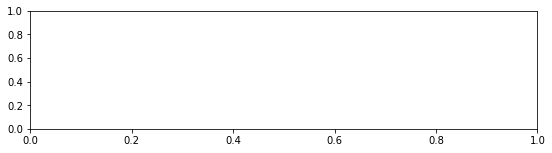

In [187]:
#Plot
plt.figure(figsize=(20,10))
plt.subplot(4,2,1)
plt.plot(df1[df1['Artist'] == 'Katy Perry'])
plt.show()

In [127]:
#Filtering by Artist
by_artist_df = spotify_df.groupby('Artist').rank()
by_artist_df


,Index,Year,Tempo,Energy,dnce,dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.5,4.0,8.5,8.0,8.5,8.0,5.0,3.0,8.0,9.0,9.0
3,1.0,2.0,5.0,12.5,12.5,11.5,1.0,12.5,12.0,4.0,5.5,12.0
4,1.0,1.5,3.5,11.0,5.5,7.5,4.0,2.5,4.5,3.0,5.5,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
598,2.0,2.5,1.0,2.0,2.0,1.5,2.0,1.0,1.0,2.0,1.0,2.0
599,11.0,9.0,5.0,10.0,5.0,5.5,3.0,5.0,4.0,7.0,10.0,4.0
600,3.0,3.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,1.0
601,3.0,2.5,2.0,3.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,1.0
